<a href="https://colab.research.google.com/github/dkchebet7/Autolib-data-analysis/blob/master/Moringa_Data_Science_Prep_W4_Independent_Project_2019_07_Daisy_Chebet_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Import Libraries***

In [0]:
##  Importing panda and numpy libraty
import pandas as pd
import numpy as np



# *Load Dataset*

In [0]:
## Loading data from url
Data = pd.read_csv('http://bit.ly/Autolibdataset')

In [3]:
Data.head(10)

,Unnamed: 0,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,0,24 Rue Vulpian,3,3,1,0,1,operational,Paris,NaN,paris-vulpian-24,STATION,"48.8310493, 2.3460584",75013,Paris/Vulpian/24,operational,NaN,1,station,ok,nonexistent,2018,4,1,0,0
1,1,8 Boulevard Richard Lenoir,0,0,0,0,1,operational,Paris,NaN,paris-richardlenoir-8,STATION,"48.8545026, 2.370183",75011,Paris/Richard Lenoir/8,operational,NaN,3,station,ok,nonexistent,2018,4,1,0,0
2,2,4 Rue Charles Bossut,3,3,0,0,1,operational,Paris,NaN,paris-charlesbossut-4,STATION,"48.8431847, 2.3837959",75012,Paris/Charles Bossut/4,operational,NaN,2,station,ok,nonexistent,2018,4,1,0,0
3,3,3 avenue Claude Vellefaux,4,4,0,0,0,operational,Paris,NaN,paris-claudevellefaux-3,STATION,"48.8740623, 2.3703034",75010,Paris/Claude Vellefaux/3,operational,NaN,1,station,ok,nonexistent,2018,4,1,0,0
4,4,236 Boulevard Voltaire,1,1,0,0,1,operational,Paris,NaN,paris-voltaire-236,STATION,"48.852023, 2.389719",75011,Paris/Voltaire/236,operational,NaN,4,station,ok,nonexistent,2018,4,1,0,0
5,5,44 Rue des Pirogues de Bercy,1,1,0,0,2,operational,Paris,NaN,paris-piroguesdebercy-44,STATION,"48.8334137, 2.388111",75012,Paris/Pirogues de Bercy/44,operational,NaN,4,station,ok,nonexistent,2018,4,1,0,0
6,6,63 Boulevard Richard Lenoir,1,1,0,0,2,operational,Paris,NaN,paris-richardlenoir-63,STATION,"48.86023, 2.3719914",75011,Paris/Richard Lenoir/63,operational,NaN,4,station,ok,nonexistent,2018,4,1,0,0
7,7,43 Rue de Monceau,0,0,0,0,2,operational,Paris,NaN,paris-monceau-43,STATION,"48.8778333, 2.310832",75008,Paris/Monceau/43,operational,NaN,6,station,ok,nonexistent,2018,4,1,0,0
8,8,10 Avenue du Docteur Arnold Netter,4,4,0,0,0,operational,Paris,NaN,paris-arnoldnetter-10,STATION,"48.8415951, 2.4050137",75012,Paris/Arnold Netter/10,operational,NaN,0,station,ok,nonexistent,2018,4,1,0,0
9,9,33 Avenue Pierre 1er de Serbie,2,2,0,0,1,operational,Paris,NaN,paris-pierre1erdeserbie-33,STATION,"48.8673767, 2.2988559",75016,Paris/Pierre 1er de Serbie/33,operational,NaN,3,station,ok,nonexistent,2018,4,1,0,0


## ***STANDERDIZATION***

In [4]:
## Removing spaces fron the coulmn names and white spaces replacing it with an underscore.
Data.columns = Data.columns.str.strip().str.replace(' ','_')
Data.head()

,Unnamed:_0,Address,Cars,Bluecar_counter,Utilib_counter,Utilib_1.4_counter,Charge_Slots,Charging_Status,City,Displayed_comment,ID,Kind,Geo_point,Postal_code,Public_name,Rental_status,Scheduled_at,Slots,Station_type,Status,Subscription_status,year,month,day,hour,minute
0,0,24 Rue Vulpian,3,3,1,0,1,operational,Paris,NaN,paris-vulpian-24,STATION,"48.8310493, 2.3460584",75013,Paris/Vulpian/24,operational,NaN,1,station,ok,nonexistent,2018,4,1,0,0
1,1,8 Boulevard Richard Lenoir,0,0,0,0,1,operational,Paris,NaN,paris-richardlenoir-8,STATION,"48.8545026, 2.370183",75011,Paris/Richard Lenoir/8,operational,NaN,3,station,ok,nonexistent,2018,4,1,0,0
2,2,4 Rue Charles Bossut,3,3,0,0,1,operational,Paris,NaN,paris-charlesbossut-4,STATION,"48.8431847, 2.3837959",75012,Paris/Charles Bossut/4,operational,NaN,2,station,ok,nonexistent,2018,4,1,0,0
3,3,3 avenue Claude Vellefaux,4,4,0,0,0,operational,Paris,NaN,paris-claudevellefaux-3,STATION,"48.8740623, 2.3703034",75010,Paris/Claude Vellefaux/3,operational,NaN,1,station,ok,nonexistent,2018,4,1,0,0
4,4,236 Boulevard Voltaire,1,1,0,0,1,operational,Paris,NaN,paris-voltaire-236,STATION,"48.852023, 2.389719",75011,Paris/Voltaire/236,operational,NaN,4,station,ok,nonexistent,2018,4,1,0,0


## ***VALIDITY***

In [5]:
## Droping unecessary columns
Data.drop(['Cars','Address','Charging_Status','Displayed_comment','Geo_point','Scheduled_at','Slots','Station_type'], axis=1 ,inplace =True)
Data.head()

,Unnamed:_0,Bluecar_counter,Utilib_counter,Utilib_1.4_counter,Charge_Slots,City,ID,Kind,Postal_code,Public_name,Rental_status,Status,Subscription_status,year,month,day,hour,minute
0,0,3,1,0,1,Paris,paris-vulpian-24,STATION,75013,Paris/Vulpian/24,operational,ok,nonexistent,2018,4,1,0,0
1,1,0,0,0,1,Paris,paris-richardlenoir-8,STATION,75011,Paris/Richard Lenoir/8,operational,ok,nonexistent,2018,4,1,0,0
2,2,3,0,0,1,Paris,paris-charlesbossut-4,STATION,75012,Paris/Charles Bossut/4,operational,ok,nonexistent,2018,4,1,0,0
3,3,4,0,0,0,Paris,paris-claudevellefaux-3,STATION,75010,Paris/Claude Vellefaux/3,operational,ok,nonexistent,2018,4,1,0,0
4,4,1,0,0,1,Paris,paris-voltaire-236,STATION,75011,Paris/Voltaire/236,operational,ok,nonexistent,2018,4,1,0,0


In [0]:
# Saving the data as a csv file(To have a new dataset and save on space)
Data.to_csv('Data2.csv')

In [0]:
## Loading the new csv data
import pandas as pd
import numpy as np

Main_Data = pd.read_csv('Data2.csv')

In [0]:
Main_Data.head()

,Unnamed: 0,Unnamed:_0,Bluecar_counter,Utilib_counter,Utilib_1.4_counter,Charge_Slots,City,ID,Kind,Postal_code,Public_name,Rental_status,Status,Subscription_status,year,month,day,hour,minute
0,0,0,3,1,0,1,Paris,paris-vulpian-24,STATION,75013,Paris/Vulpian/24,operational,ok,nonexistent,2018,4,1,0,0
1,1,1,0,0,0,1,Paris,paris-richardlenoir-8,STATION,75011,Paris/Richard Lenoir/8,operational,ok,nonexistent,2018,4,1,0,0
2,2,2,3,0,0,1,Paris,paris-charlesbossut-4,STATION,75012,Paris/Charles Bossut/4,operational,ok,nonexistent,2018,4,1,0,0
3,3,3,4,0,0,0,Paris,paris-claudevellefaux-3,STATION,75010,Paris/Claude Vellefaux/3,operational,ok,nonexistent,2018,4,1,0,0
4,4,4,1,0,0,1,Paris,paris-voltaire-236,STATION,75011,Paris/Voltaire/236,operational,ok,nonexistent,2018,4,1,0,0


## *COMPLETENESS*

In [0]:
## Checking for missing values if any
Main_Data.isnull().any()

Unnamed: 0             False
Unnamed:_0             False
Bluecar_counter        False
Utilib_counter         False
Utilib_1.4_counter     False
Charge_Slots           False
City                   False
ID                     False
Kind                   False
Postal_code            False
Public_name            False
Rental_status          False
Status                 False
Subscription_status    False
year                   False
month                  False
day                    False
hour                   False
minute                 False
dtype: bool

## ***ANALYSIS***

 ***Research Question 1*** 

In [0]:
## Identify the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018

In [0]:
## Subsetting the paris dataset
paris = Main_Data[(Main_Data.City == 'Paris')]


In [0]:
paris.head()

,Unnamed: 0,Unnamed:_0,Bluecar_counter,Utilib_counter,Utilib_1.4_counter,Charge_Slots,City,ID,Kind,Postal_code,Public_name,Rental_status,Status,Subscription_status,year,month,day,hour,minute
0,0,0,3,1,0,1,Paris,paris-vulpian-24,STATION,75013,Paris/Vulpian/24,operational,ok,nonexistent,2018,4,1,0,0
1,1,1,0,0,0,1,Paris,paris-richardlenoir-8,STATION,75011,Paris/Richard Lenoir/8,operational,ok,nonexistent,2018,4,1,0,0
2,2,2,3,0,0,1,Paris,paris-charlesbossut-4,STATION,75012,Paris/Charles Bossut/4,operational,ok,nonexistent,2018,4,1,0,0
3,3,3,4,0,0,0,Paris,paris-claudevellefaux-3,STATION,75010,Paris/Claude Vellefaux/3,operational,ok,nonexistent,2018,4,1,0,0
4,4,4,1,0,0,1,Paris,paris-voltaire-236,STATION,75011,Paris/Voltaire/236,operational,ok,nonexistent,2018,4,1,0,0


In [11]:
## Grouping hour and blue_car from the main dataset 
# Getting the difference 
Pariscity = paris.groupby(['hour'])['Bluecar_counter'].sum().diff().sort_values(ascending = True)
Pariscity

hour
23   -54699.0
8    -47931.0
12   -38099.0
19   -18161.0
7    -15413.0
15   -14226.0
22   -13304.0
17   -13038.0
18   -12423.0
16   -11422.0
11    -9607.0
4     -1937.0
9       489.0
13     6075.0
5      6707.0
14     6819.0
6      7257.0
3     12563.0
1     14061.0
10    23117.0
20    38070.0
2     64544.0
21    66986.0
0         NaN
Name: Bluecar_counter, dtype: float64

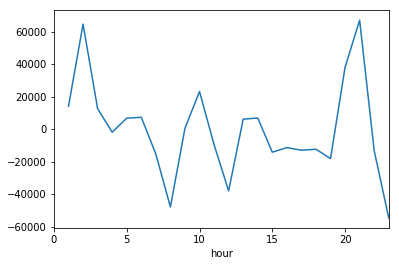

In [49]:
## Plotting the most popular hour of the day for picking up blue cars in paris
Pariscity = paris.groupby(['hour'])['Bluecar_counter'].sum().diff().plot()
Pariscity

***Research question2***

In [0]:
## What is the most popular hour for returning cars?

In [0]:
Main_Data['total_cars'] = Main_Data.iloc[:,2:4].sum(axis = 1)

In [0]:
Main_Data.head()

,Unnamed: 0,Unnamed:_0,Bluecar_counter,Utilib_counter,Utilib_1.4_counter,Charge_Slots,City,ID,Kind,Postal_code,Public_name,Rental_status,Status,Subscription_status,year,month,day,hour,minute,total_cars
0,0,0,3,1,0,1,Paris,paris-vulpian-24,STATION,75013,Paris/Vulpian/24,operational,ok,nonexistent,2018,4,1,0,0,4
1,1,1,0,0,0,1,Paris,paris-richardlenoir-8,STATION,75011,Paris/Richard Lenoir/8,operational,ok,nonexistent,2018,4,1,0,0,0
2,2,2,3,0,0,1,Paris,paris-charlesbossut-4,STATION,75012,Paris/Charles Bossut/4,operational,ok,nonexistent,2018,4,1,0,0,3
3,3,3,4,0,0,0,Paris,paris-claudevellefaux-3,STATION,75010,Paris/Claude Vellefaux/3,operational,ok,nonexistent,2018,4,1,0,0,4
4,4,4,1,0,0,1,Paris,paris-voltaire-236,STATION,75011,Paris/Voltaire/236,operational,ok,nonexistent,2018,4,1,0,0,1


In [0]:
## Subsetting hour,and summation of cars to get the most popular 
# Creating a variable with an additional columns for total_cars

cars = Main_Data.groupby(['hour'])['total_cars'].sum().diff().sort_values(ascending=True)


In [0]:
cars

hour
8    -100818.0
23    -95295.0
12    -66671.0
7     -51212.0
18    -46892.0
17    -46682.0
11    -35382.0
16    -32022.0
15    -31394.0
9     -28777.0
19    -25152.0
22    -10068.0
6      -8568.0
4       5433.0
5       6506.0
14      8264.0
13     11217.0
10     25053.0
3      35061.0
1      46431.0
20     72698.0
21    117454.0
2     207678.0
0          NaN
Name: total_cars, dtype: float64

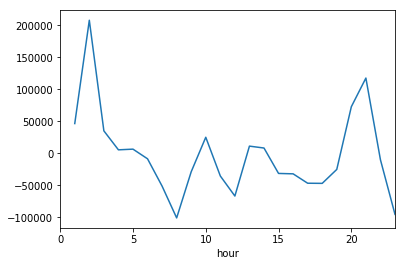

In [51]:
## Plotting the most popular hours for returning cars overally
cars = Main_Data.groupby(['hour'])['total_cars'].sum().diff().plot()

Research question 3

In [0]:
## What station is the most popular?
## Overall?
## At the most popular picking hour?

In [0]:
## Determining the most popular picking hour

popular_picking_hour = Main_Data.groupby(['hour'])['total_cars'].sum().diff().sort_values(ascending = False)

In [0]:
popular_picking_hour

hour
2     207678.0
21    117454.0
20     72698.0
1      46431.0
3      35061.0
10     25053.0
13     11217.0
14      8264.0
5       6506.0
4       5433.0
6      -8568.0
22    -10068.0
19    -25152.0
9     -28777.0
15    -31394.0
16    -32022.0
11    -35382.0
17    -46682.0
18    -46892.0
7     -51212.0
12    -66671.0
23    -95295.0
8    -100818.0
0          NaN
Name: total_cars, dtype: float64

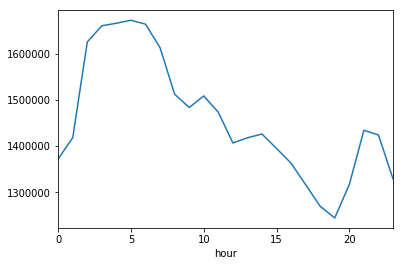

In [53]:
## Plotting the most popular picking hour overally
popular_picking_hour = Main_Data.groupby(['hour'])['total_cars'].sum().plot()

In [0]:
Popular_station = Main_Data.groupby(['ID','hour'])['total_cars'].sum().sort_values(ascending = False)

In [16]:
Popular_station.head()

ID                              hour
leplessisrobinson-galilee-16    16      3662
nanterre-georgesclemenceau-205  6       3627
                                8       3624
                                7       3613
leplessisrobinson-galilee-16    15      3612
Name: total_cars, dtype: int64

In [0]:
# Popular station at the most popular picking hour
## Subsetting the most popular picking hour (8)

Hour = Main_Data[(Main_Data.hour == 8)]

In [0]:
Hour.head()

,Unnamed: 0,Unnamed:_0,Bluecar_counter,Utilib_counter,Utilib_1.4_counter,Charge_Slots,City,ID,Kind,Postal_code,Public_name,Rental_status,Status,Subscription_status,year,month,day,hour,minute,total_cars
542414,542414,0,1,0,0,1,Paris,paris-voltaire-106,SPACE,75011,Paris/Voltaire/106,operational,ok,broken,2018,4,1,8,0,1
542415,542415,1,0,0,0,1,Paris,paris-parmentier-2,SPACE,75011,Paris/Parmentier/2,operational,ok,operational,2018,4,1,8,0,0
542416,542416,2,4,0,0,0,Paris,paris-tolbiac-245,STATION,75013,Paris/Tolbiac/245,operational,ok,nonexistent,2018,4,1,8,0,4
542417,542417,3,5,0,0,0,Paris,paris-tolbiac-145,STATION,75013,Paris/Tolbiac/145,operational,ok,nonexistent,2018,4,1,8,0,5
542418,542418,4,1,0,0,0,Paris,paris-diderot-24,SPACE,75012,Paris/Diderot/24,operational,ok,operational,2018,4,1,8,0,1


In [0]:
popular_station_hour = Hour.groupby(['Public_name'])['total_cars'].sum().sort_values(ascending = False)

In [19]:
popular_station_hour.head()

Public_name
Nanterre/Georges ClÃ©menceau/205    3624
Le Plessis-Robinson/GalilÃ©e/16     3542
Les Lilas/LÃ©on Renault/19          3329
Vincennes/Fontenay/194              3248
Issy-les-Moulineaux/Vaudetard/7     3173
Name: total_cars, dtype: int64

Research question4

In [0]:
# What postal code is the most popular for picking up Bluecars? Does the most popular station belong to that postal code?
# Overall?
# At the most popular picking hour?

In [0]:
## subset postal code,hours and blue cars and get the difference
Postal_data = Main_Data.groupby(['hour','Postal_code'])['Bluecar_counter'].sum().diff().sort_values(ascending = True)


In [30]:
Postal_data.head()

hour  Postal_code
4     75112         -73330.0
3     75112         -72900.0
5     75112         -72340.0
6     75112         -71101.0
2     75112         -70201.0
Name: Bluecar_counter, dtype: float64

Research question 5

In [0]:
## Do the results change if you consider Utilib and Utilib 1.4 instead of Bluecars? 
# (that could be asked earlier to push students to write modular code that can be used to query different things)

In [0]:
## SUMING Utilib and Utilib 1.4
paris['new_column'] = paris.iloc[:,3:4].sum(axis=1)

In [43]:
paris.head()

,Unnamed: 0,Unnamed:_0,Bluecar_counter,Utilib_counter,Utilib_1.4_counter,Charge_Slots,City,ID,Kind,Postal_code,Public_name,Rental_status,Status,Subscription_status,year,month,day,hour,minute,total_cars,new_column
0,0,0,3,1,0,1,Paris,paris-vulpian-24,STATION,75013,Paris/Vulpian/24,operational,ok,nonexistent,2018,4,1,0,0,4,1
1,1,1,0,0,0,1,Paris,paris-richardlenoir-8,STATION,75011,Paris/Richard Lenoir/8,operational,ok,nonexistent,2018,4,1,0,0,0,0
2,2,2,3,0,0,1,Paris,paris-charlesbossut-4,STATION,75012,Paris/Charles Bossut/4,operational,ok,nonexistent,2018,4,1,0,0,3,0
3,3,3,4,0,0,0,Paris,paris-claudevellefaux-3,STATION,75010,Paris/Claude Vellefaux/3,operational,ok,nonexistent,2018,4,1,0,0,4,0
4,4,4,1,0,0,1,Paris,paris-voltaire-236,STATION,75011,Paris/Voltaire/236,operational,ok,nonexistent,2018,4,1,0,0,1,0


In [0]:
Pariscity2 = paris.groupby(['hour'])['new_column'].sum().diff().sort_values(ascending =True )

In [45]:
Pariscity2

hour
12   -1830.0
23   -1187.0
17   -1140.0
15   -1049.0
18    -860.0
9     -835.0
22    -610.0
8     -602.0
11    -439.0
14      63.0
20     159.0
3      181.0
5      186.0
16     297.0
1      330.0
4      339.0
6      414.0
7      465.0
19     560.0
10     745.0
21     877.0
13    1035.0
2     1392.0
0        NaN
Name: new_column, dtype: float64

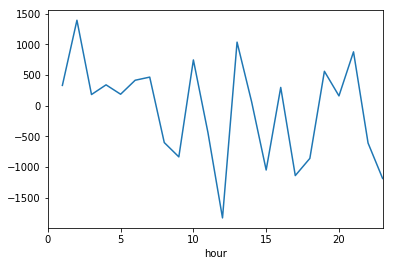

In [54]:
## Plotting the most popular hour of the day for picking up utilib and utilib4 in paris
Pariscity2 = paris.groupby(['hour'])['new_column'].sum().diff().plot()

## **proving the null hypothesis**

In [0]:
Null_hypothesis = Main_Data.groupby(['City'])['total_cars'].sum().sort_values(ascending = False)

In [48]:
Null_hypothesis.head()

City
Paris                  14748051
Nanterre                1615484
Issy-les-Moulineaux      871885
Rueil-Malmaison          844659
CrÃ©teil                 835018
Name: total_cars, dtype: int64

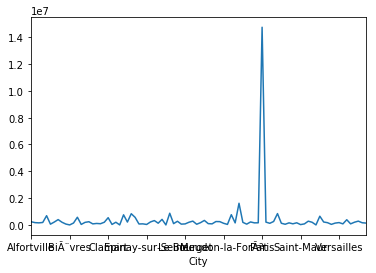

In [57]:
## Ploting the city with the highest use in electric car sharing 
Null_hypothesis = Main_Data.groupby(['City'])['total_cars'].sum().plot()
